In [ ]:
GOAL5

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, year, regexp_replace

# Initialize Spark Session
spark = SparkSession.builder.appName("Car Price Trend Analysis").getOrCreate()

# Load the data
df = spark.read.csv('output.csv', header=True, inferSchema=True)

# Data cleaning
# Convert 'New_Price' to a numeric format. Assuming 'New_Price' is like '1.5 Lakh' or '10.5 Crore'
# For simplicity, let's just handle 'Lakh' and assume 'Crore' is not present or handled separately
df = df.withColumn('New_Price_Num', regexp_replace('New_Price', ' Lakh', '').cast('float') * 100000)

# Analyzing trends in Price over time
# Group by 'Year', calculate average 'Price', and average 'New_Price_Num'
price_trends = df.groupBy('Name', 'Year').agg(
    avg(col('Price')).alias('Average_Price')
).orderBy('Year')

# Show the results
price_trends.coalesce(1).write.mode('overwrite').csv('trend_analysis_output.csv', header=True)


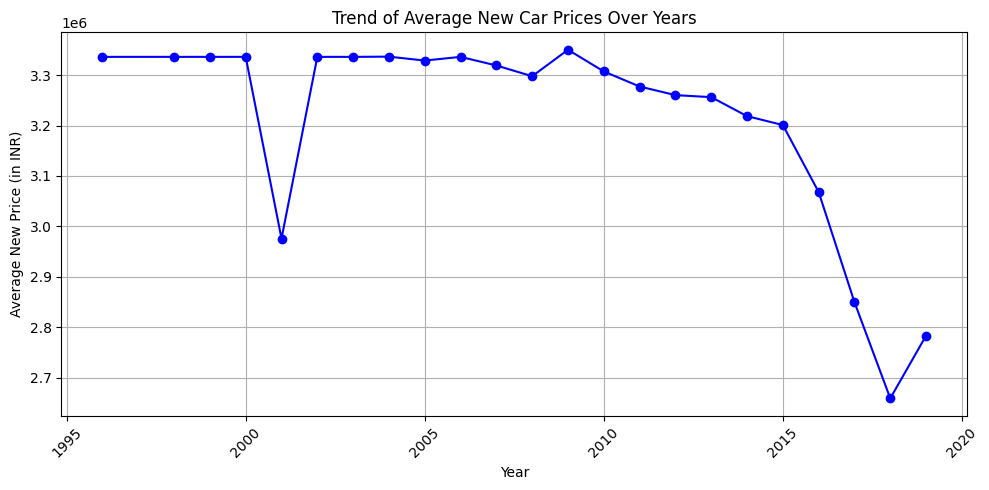

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure you've run the Spark session and generated the `price_trends` DataFrame as per your snippet above

# Convert the Spark DataFrame to a Pandas DataFrame for plotting
price_trends_pd = price_trends.toPandas()

# Plotting the trend of average new car prices over the years
plt.figure(figsize=(10, 5))
plt.plot(price_trends_pd['Year'], price_trends_pd['Average_New_Price'], marker='o', linestyle='-', color='blue')
plt.title('Trend of Average New Car Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average New Price (in INR)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()
